In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
train_data = os.path.join('./Combined/Train')
test_data = os.path.join('./Combined/Test')

In [3]:
activities = ['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [4]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for activity in activities:
    folder = os.path.join(train_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(train_data,activity,csv),header=0)
        x_train.append(df.values[:500])
        y_train.append(activity)
for activity in activities:
    folder = os.path.join(test_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(test_data,activity,csv),header=0)
        x_test.append(df.values[:500])
        y_test.append(activity)
    

In [5]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(f"Shape of X_train = {x_train.shape}") 
print(f'Shape of y_train = {y_train.shape}')

x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"Shape of X_test = {x_test.shape}")
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (126, 500, 3)
Shape of y_train = (126,)
Shape of X_test = (54, 500, 3)
Shape of y_test = (54,)


## Question 1

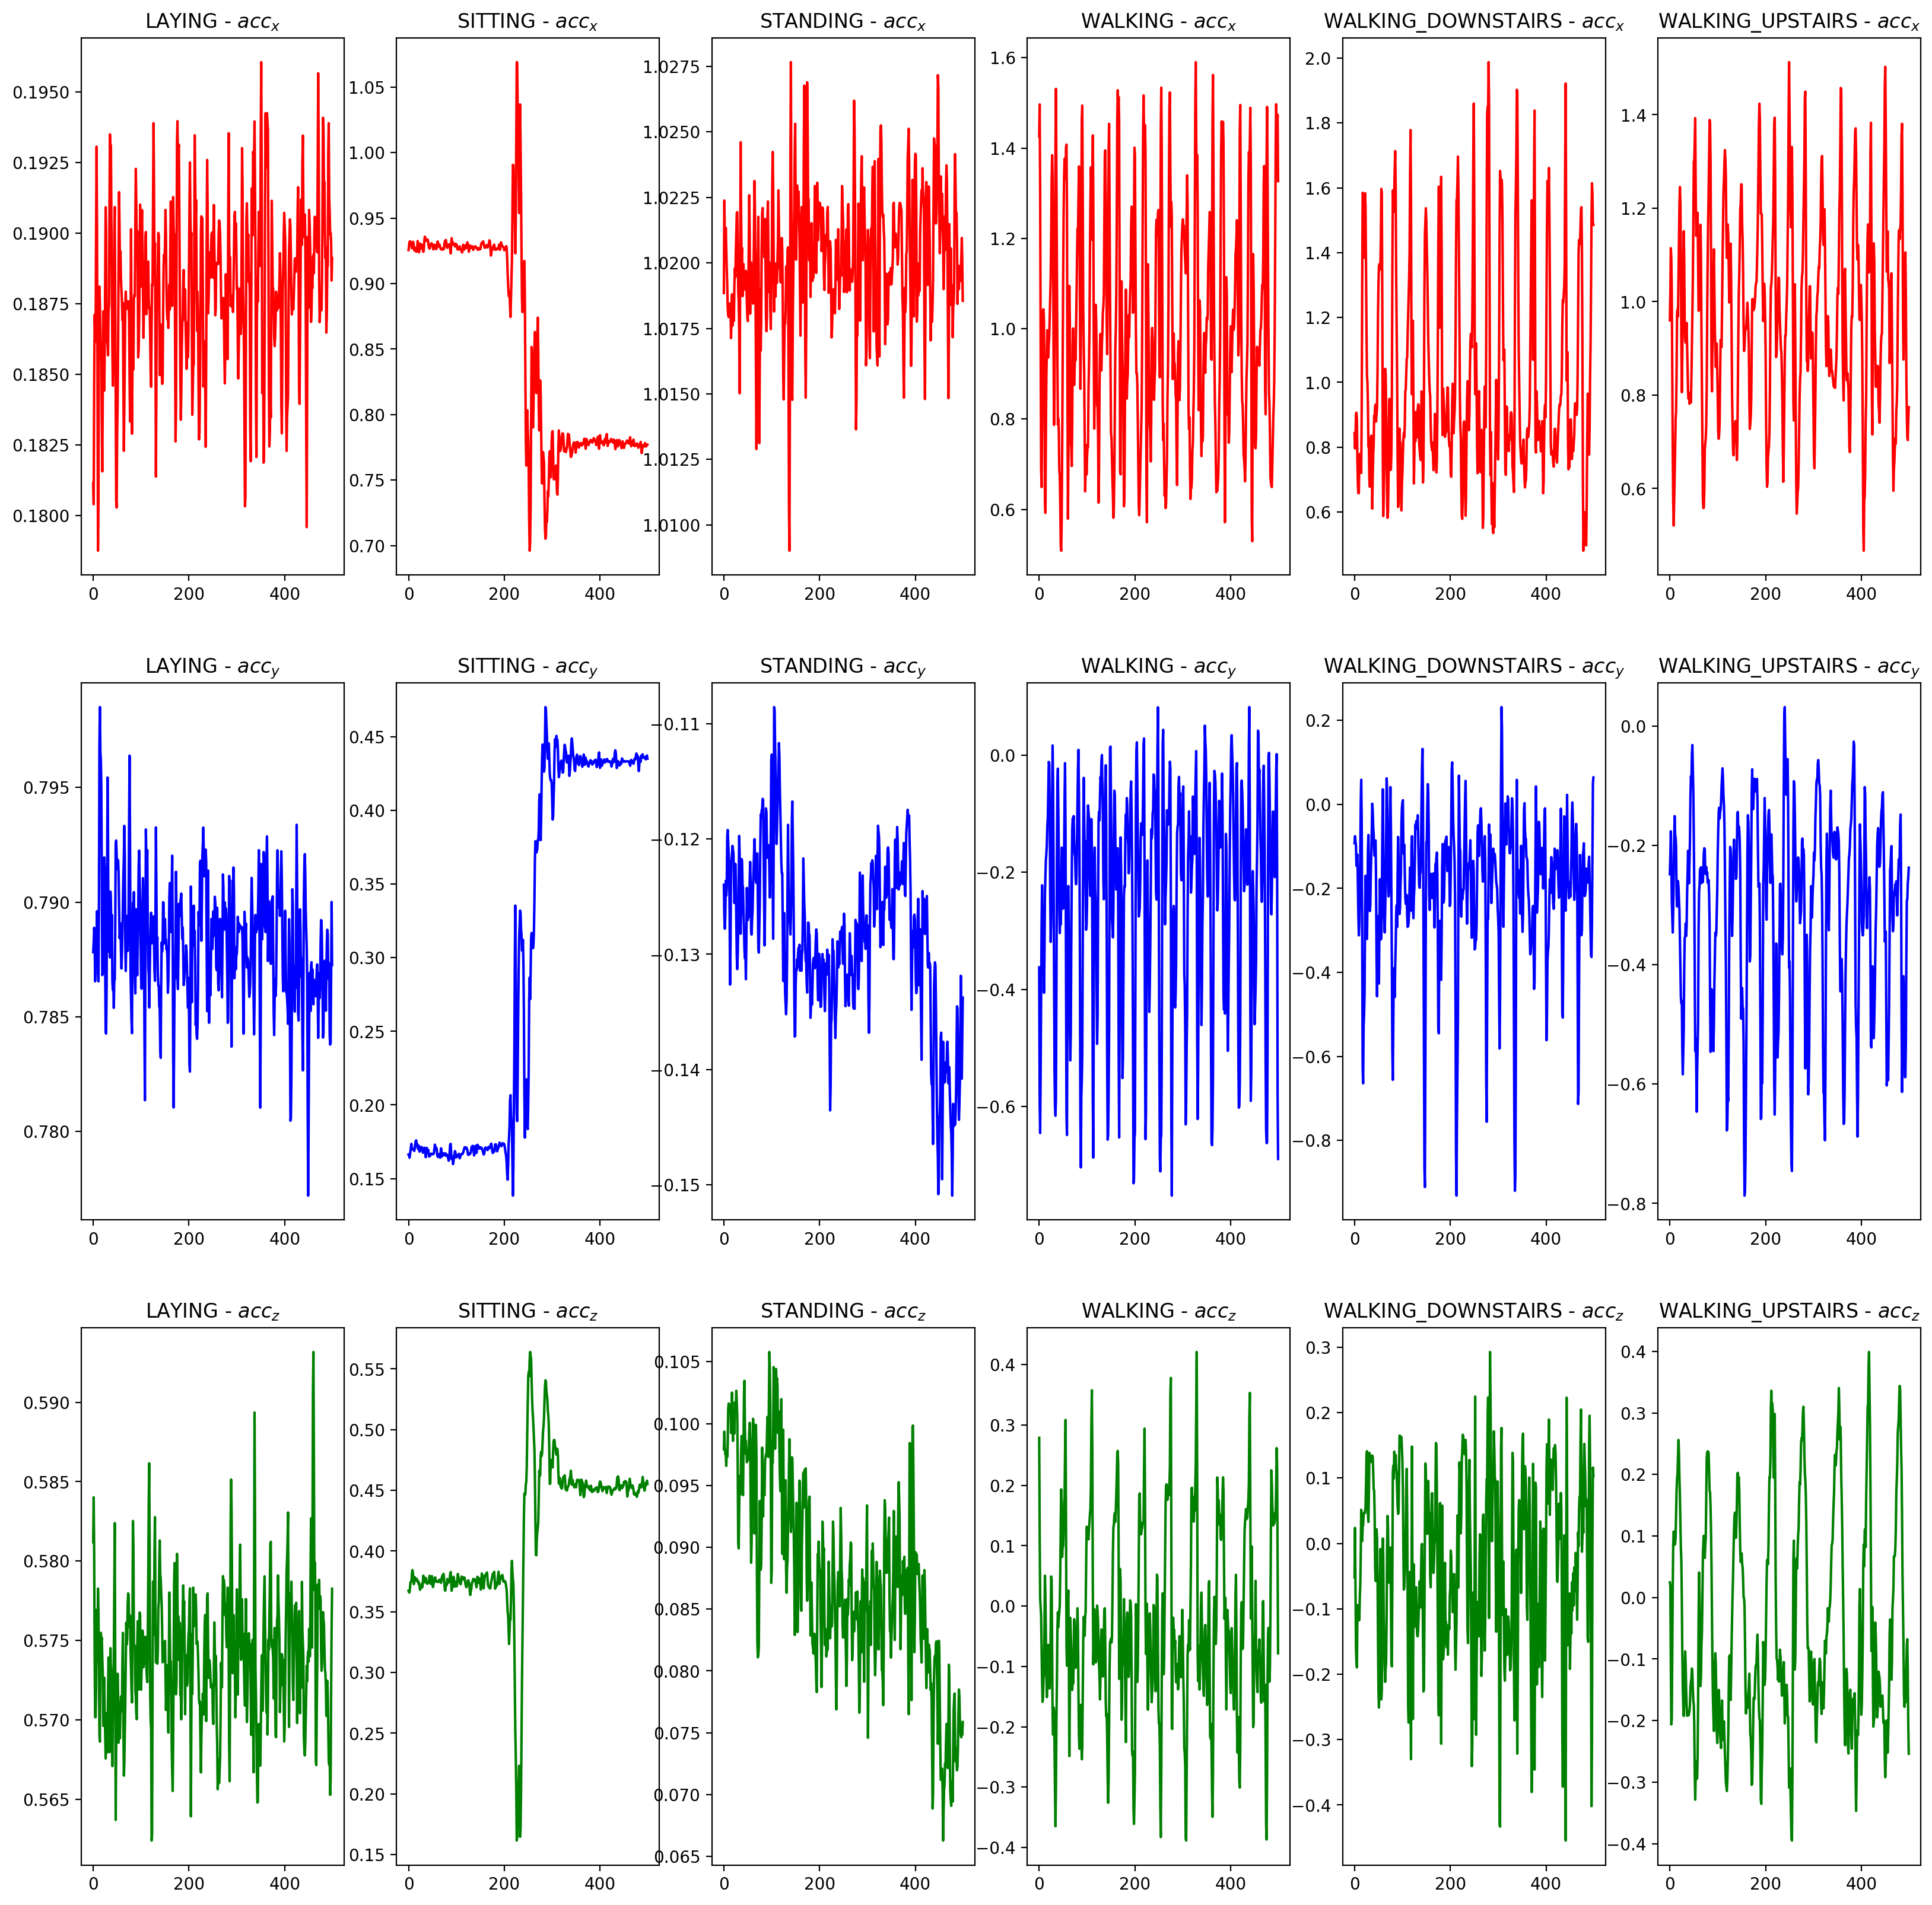

In [6]:
plt.figure(figsize=(20,20))
for i in range(6):
    activity = activities[i]
    data = x_train[i*21]
    acc_x = data[:,0]
    acc_y = data[:,1]
    acc_z = data[:,2]
    x = np.arange(0,500,1)
    plt.subplot(3,6,i+1)
    plt.plot(x,acc_x,c='r')
    plt.title(f"{activity} - $acc_x$")
    plt.subplot(3,6,i+7)
    plt.plot(x,acc_y,c='b')
    plt.title(f"{activity} - $acc_y$")
    plt.subplot(3,6,i+13)
    plt.plot(x,acc_z,c='g')
    plt.title(f"{activity} - $acc_z$")
plt.show()

Yes, there are evident differences between the accelerometer data of different activities. For instance, the variance in the acceleration values of dynamic activities like walking or climbing is much higher than that of the static activities like sitting, laying.

In [7]:
total_acceleration = x_train[:,:,0]**2 + x_train[:,:,1]**2 + x_train[:,:,2]**2
for i in range(len(activities)):
    activity=activities[i]
    var_ = total_acceleration[i*21:(i+1)*21].var()
    mean_ = total_acceleration[i*21:(i+1)*21].mean()
    print(f"Mean total acceleration for activity {activity} = {mean_}")
    print(f"Mean total acceleration for activity {activity} = {var_}")

Mean total acceleration for activity LAYING = 1.0103142450756741
Mean total acceleration for activity LAYING = 0.00046204993741151107
Mean total acceleration for activity SITTING = 1.029346570214143
Mean total acceleration for activity SITTING = 0.0005658598040530853
Mean total acceleration for activity STANDING = 1.0650814326336357
Mean total acceleration for activity STANDING = 0.00027748397579156124
Mean total acceleration for activity WALKING = 1.1545508057464684
Mean total acceleration for activity WALKING = 0.25233633148708084
Mean total acceleration for activity WALKING_DOWNSTAIRS = 1.227920255515466
Mean total acceleration for activity WALKING_DOWNSTAIRS = 0.8607093928038053
Mean total acceleration for activity WALKING_UPSTAIRS = 1.1661549538347427
Mean total acceleration for activity WALKING_UPSTAIRS = 0.36599943016717296


# Question 2
There are many evident differences between the accelerometer data of static and dynamic actitvites. Therefore, we can  classify the activities by setting some threshold values for classifying based on the variance of the data. 

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(total_acceleration)
pca_data = pca.transform(total_acceleration)
pca_data.shape


(126, 2)

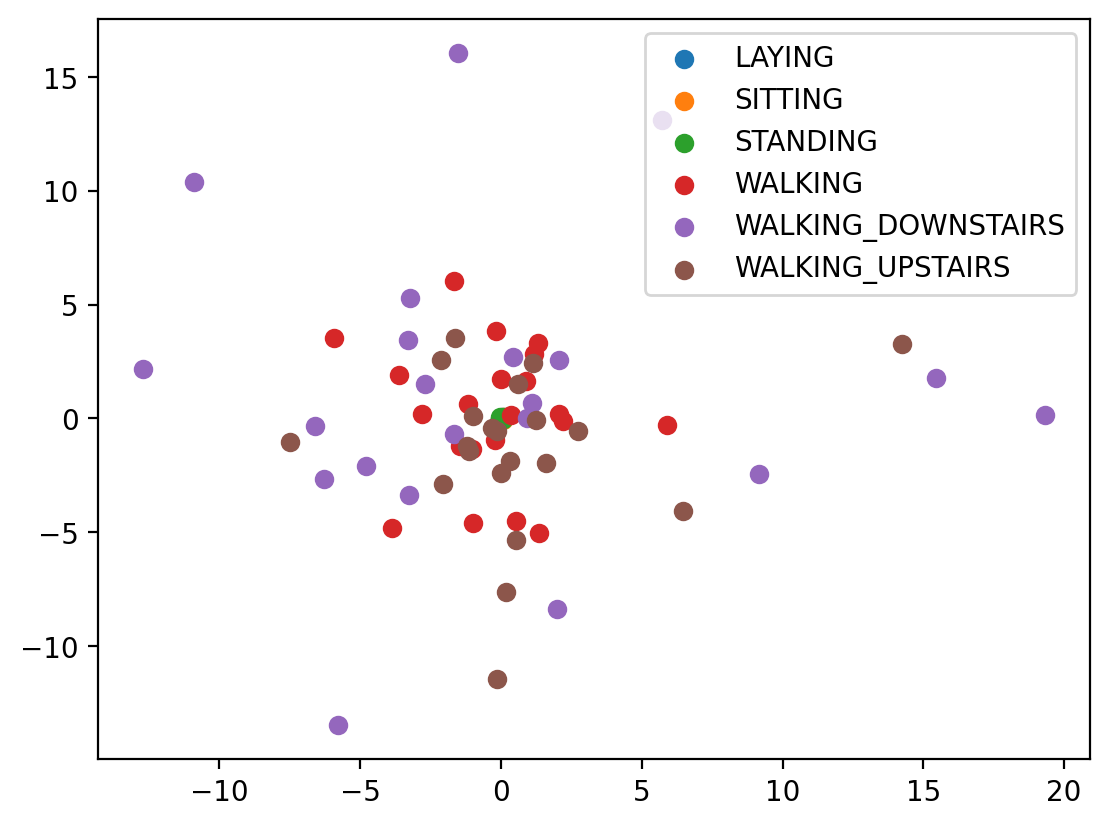

In [9]:

for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(pca_data[i*21:(i+1)*21,0],pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

In [38]:
import tsfel
from tsfel.feature_extraction.features import calc_var, pk_pk_distance, entropy, autocorr, abs_energy, distance, average_power, rms, mean_diff, interq_range, auc, calc_max, calc_median, calc_min, dfa, mean_abs_deviation, calc_mean

In [39]:
def extract_features(data):
    tsfel_features=[]
    for i in range(data.shape[0]):
        var_total = calc_var(data[i])
        pk_dist_total = pk_pk_distance(data[i]) 
        mean_diff_total = mean_diff(data[i]) 
        rms_total = rms(data[i])
        mean_total = calc_mean(data[i])
        mean_abs_deviation_total = mean_abs_deviation(data[i])
        tsfel_features.append([mean_abs_deviation_total, rms_total, mean_diff_total, pk_dist_total,var_total])
    return np.array(tsfel_features)

In [40]:
tsfel_features = extract_features(total_acceleration)
print(tsfel_features.shape)

(126, 5)


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(tsfel_features)
tsfel_pca_data = pca.transform(tsfel_features)
tsfel_pca_data.shape

(126, 2)

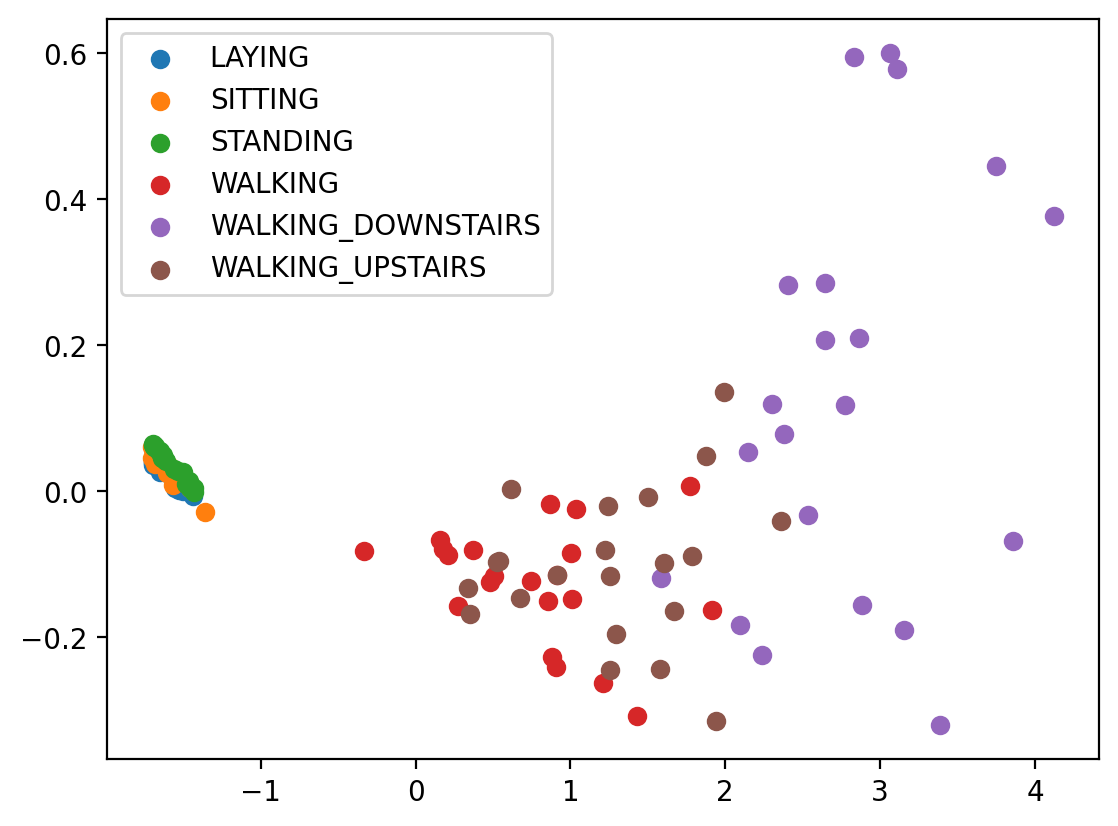

In [42]:
for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(tsfel_pca_data[i*21:(i+1)*21,0],tsfel_pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [44]:
raw_data_tree = DecisionTreeClassifier(random_state=42)
raw_data_tree.fit(total_acceleration,y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.5
Precision = 0.49128787878787883
Recall = 0.5
F1 Score = 0.48378979122013177


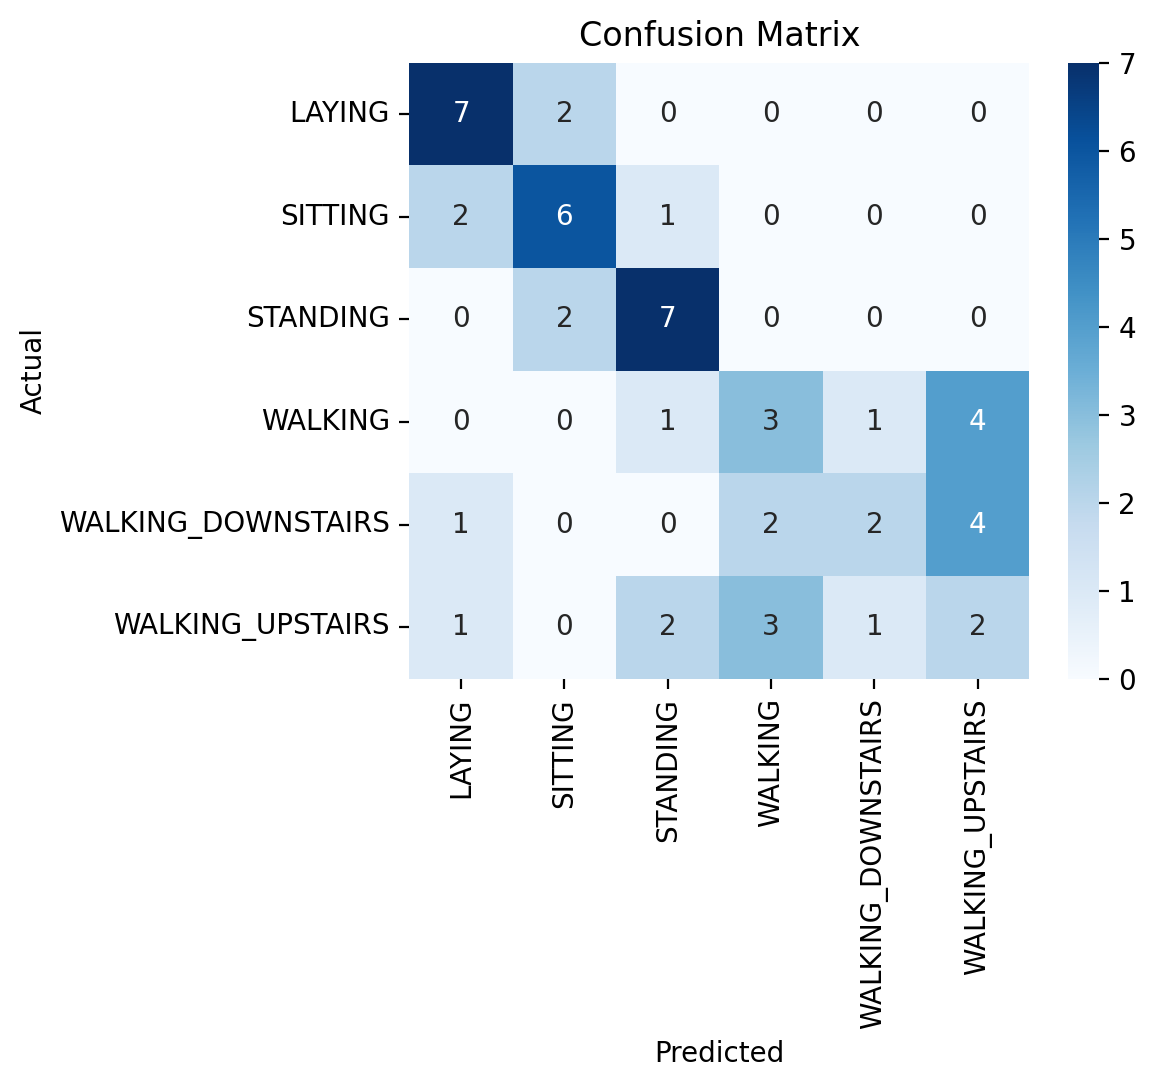

In [45]:
total_acceleration_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2
y_pred = raw_data_tree.predict(total_acceleration_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
tsfel_tree = DecisionTreeClassifier(random_state=42)
tsfel_tree.fit(tsfel_pca_data,y_train)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.5370370370370371
Precision = 0.5275372775372775
Recall = 0.5370370370370371
F1 Score = 0.5251392369813422


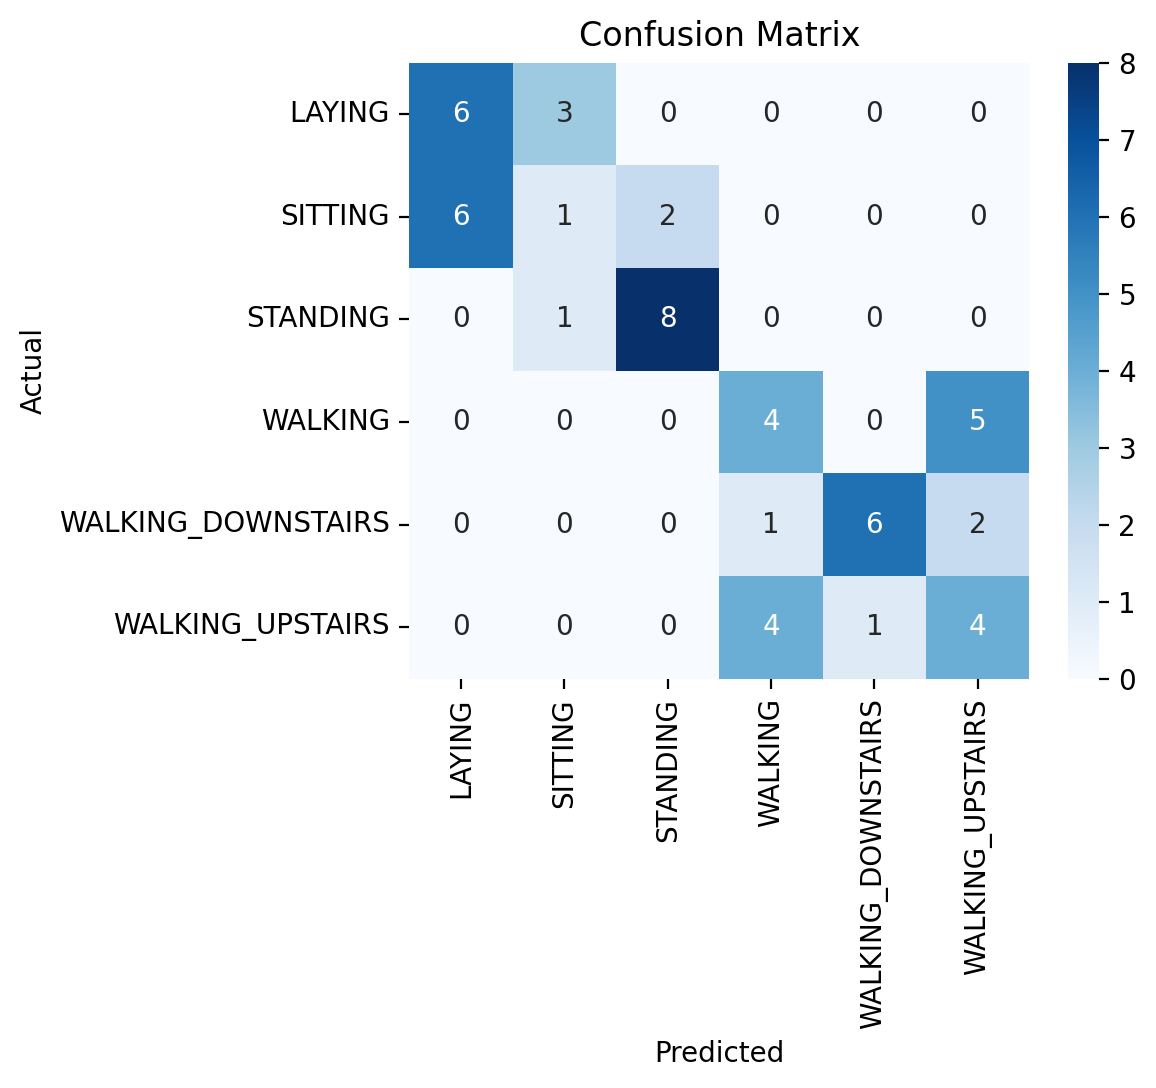

In [47]:
tsfel_features_test = extract_features(total_acceleration_test)
pca = PCA(n_components=2, random_state=42)
pca.fit(tsfel_features)
tsfel_pca_data_test = pca.transform(tsfel_features_test)
y_pred = tsfel_tree.predict(tsfel_pca_data_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()